In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/105/Data


In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [0]:
ABM_data = pd.read_csv('/content/drive/My Drive/Data/ABM_data.csv', index_col=[0], delimiter=";", parse_dates= [0])


In [4]:
ABM_data.head()

,confirmed_cases
day,
1,2
2,2
3,2
4,3
5,3


In [5]:
type(ABM_data)

pandas.core.frame.DataFrame

In [0]:
series_value = ABM_data.values

In [7]:
type(series_value)

numpy.ndarray

In [8]:
ABM_data.describe()

,confirmed_cases
count,80.000000
mean,35.487500
std,24.983536
min,2.000000
25%,10.750000
50%,34.000000
75%,59.500000
max,74.000000


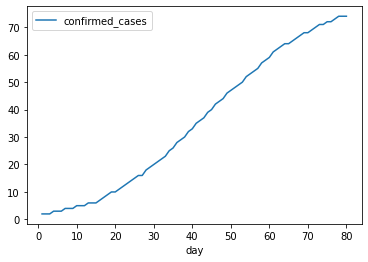

In [9]:
ABM_data.plot()

In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


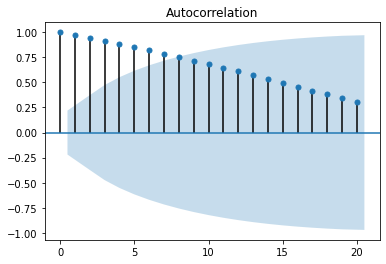

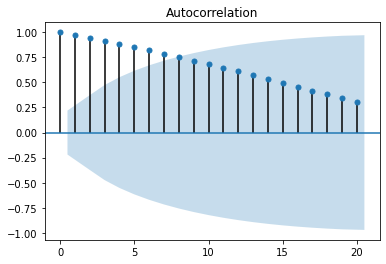

In [11]:
plot_acf(ABM_data)

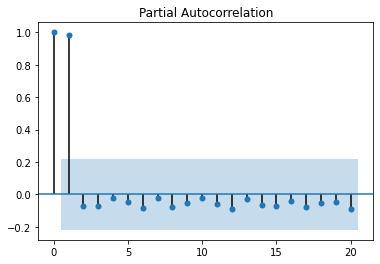

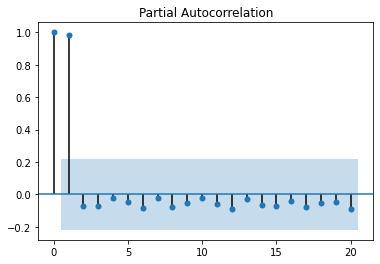

In [12]:
plot_pacf(ABM_data)

In [13]:
ABM_data.size

80

In [0]:
ABM_data_train = ABM_data[0:70]
ABM_data_test = ABM_data[70:80]

In [15]:
ABM_data_train.size

70

In [16]:
ABM_data_test.size

10

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [18]:
ABM_data_model = ARIMA(ABM_data_train, order=(2,1,3))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
ABM_data_model_fit = ABM_data_model.fit()

In [20]:
ABM_data_model_fit.aic

105.70604610535892

In [0]:
ABM_data_forecast = ABM_data_model_fit.forecast(steps = 10)[0]

In [22]:
ABM_data_forecast

array([68.9011133 , 69.73802503, 70.34789092, 71.09499797, 71.7686211 ,
       72.4902441 , 73.18943781, 73.90665622, 74.61830408, 75.3377987 ])

In [23]:
ABM_data_test

,confirmed_cases
day,
71,69
72,70
73,71
74,71
75,72
76,72
77,73
78,74
79,74


In [0]:
from sklearn.metrics import mean_squared_error

In [25]:
np.sqrt(mean_squared_error(ABM_data_test, ABM_data_forecast))

0.549832778821309

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


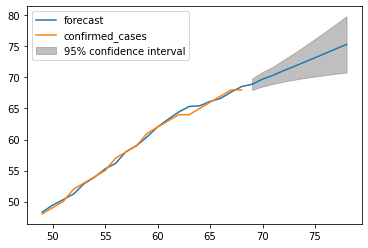

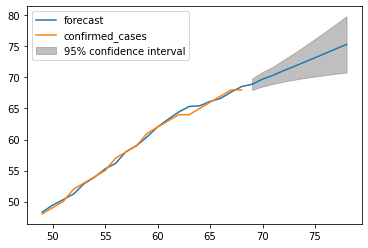

In [27]:
ABM_data_model_fit.plot_predict(50,79)

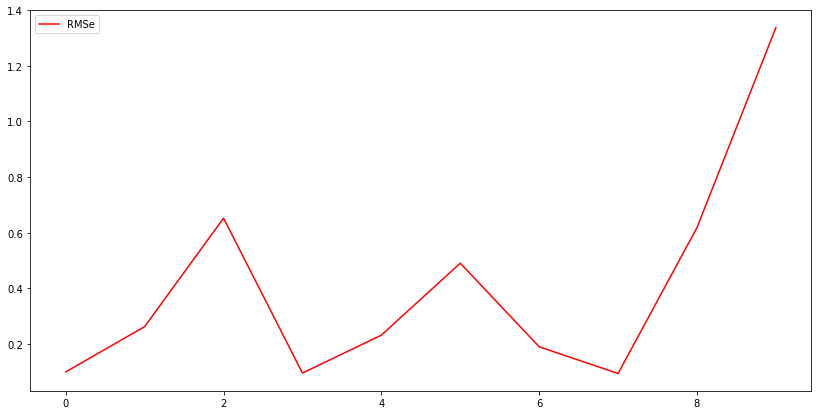

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=[]
for i in range(len(ABM_data_test)):
   #print(sqrt(((ABM_data_test.values[i][0] - ABM_data_forecast[i]) ** 2).mean()))
   rmse.append(sqrt(((ABM_data_test.values[i][0] - ABM_data_forecast[i]) ** 2).mean()))


plt.figure(figsize=(14, 7))
plt.plot(range(len(ABM_data_test)), rmse, color="red", label="RMSe")
plt.legend()